# lec6 データの可視化 - Seaborn

# Seabornを用いた可視化

In [1]:
# seabornライブラリをインポートし、snsと名付ける
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Samuel Norman Seaborn

In [2]:
tips = pd.read_csv("tips.csv")#チップのデータ

In [3]:
tips.head() #上の5行表示

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


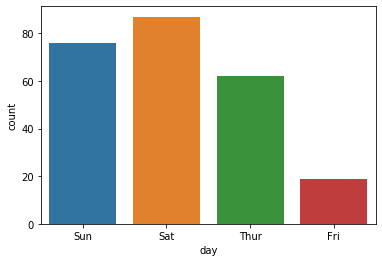

In [4]:
# 「曜日」列に存在する各要素の個数をプロット
sns.countplot(tips.day) #countplot:データの件数を棒グラフで
plt.show()

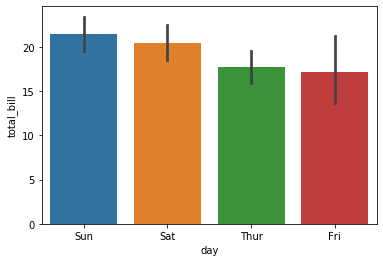

In [5]:
# 各曜日における支払総額の平均値をプロット
sns.barplot(tips.day,tips.total_bill) #barplot:平均を表す。黒の縦棒は標準偏差
plt.show()

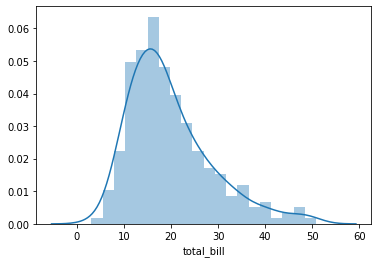

In [6]:
# snsを用いたヒストグラムの表示
# ヒストグラムを滑らかにした曲線も同時に表示される(引数にkde = Falseを指定すれば、表示をなくすことも可能)
#sns.distplot(tips.total_bill,bins=20)
sns.distplot(tips.total_bill,bins=20, kde = True) #kernel density estimation
plt.show()

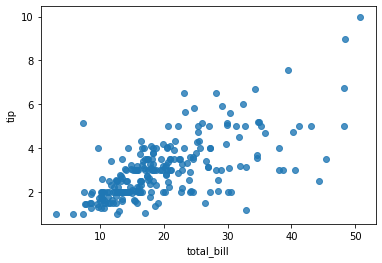

In [7]:
# 散布図の線形回帰した結果をプロット
# 95%信頼区間も表示される
sns.regplot(tips.total_bill,tips.tip, fit_reg=False)
plt.show()

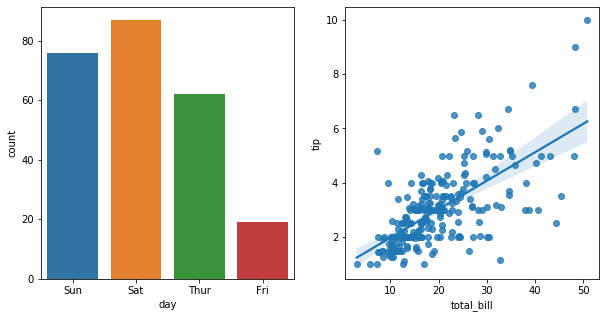

In [8]:
# seabornで描いたプロットを並べる
# countplot, regplotの引数axにaxesの名前を代入
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(tips.day,ax=ax[0])
sns.regplot(tips.total_bill,tips.tip,ax = ax[1])#regplot:線形回帰プロット
plt.show()

## 4.3 Seabornを用いた可視化 演習

#### 問題１
以下の内容をSeabornの関数を使ってそれぞれ可視化してみよう。\
ただしグラフは横1列に並べよ

|描画内容|可視化形式|
|:---|:---|
|喫煙している人、してない人 <br> の数の大小|棒グラフ|
|チップの額の分布|ヒストグラム|
|注文総額とチップの額の関係性|散布図|

答え
<!--
# 1行3列の15x5のグラフの入れ物を作成
fig,ax = plt.subplots(1,3,figsize=(15,5))

# それぞれのグラフを引数axに指定して表示
sns.countplot(tips.smoker,ax=ax[0])
sns.distplot(tips.tip,bins=20,kde=True,ax=ax[1]) #kdeは省略可
sns.regplot(tips.total_bill,tips.tip,ax=ax[2])
-->

### Seabornの強み
ヒストグラムと散布図は重要な可視化\
一つずつグラフを出すのは面倒だと思ったら、同時に出力できる関数がある。\
・pairplot()\
・corr() 

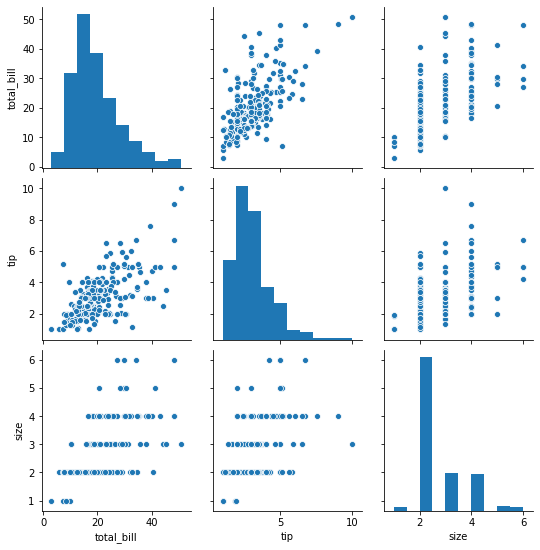

In [9]:
# 散布図行列
# 量的変数の組み合わせ分だけ、ヒストグラム・散布図を表示
sns.pairplot(tips)

In [10]:
tips.corr() #correlation coefficient 相関係数

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [11]:
# 背景に色を指定する
# 相関の情報に色がつく。相関が強いほど色が濃い
tips.corr().style.background_gradient( "summer_r")

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


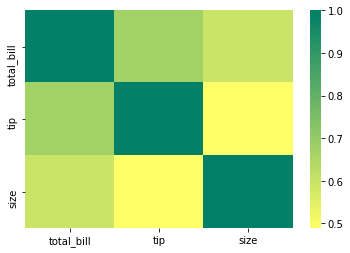

In [12]:
#heatmap:データを可視化するために、行列型の数字データの強弱を色で視覚化する方法
sns.heatmap(tips.corr(),cmap="summer_r" )

### Seabornの強み2
データの分布を見るとき「カテゴリ毎に見る」ことはよくある。\
・swarmplot()\
・boxplot()

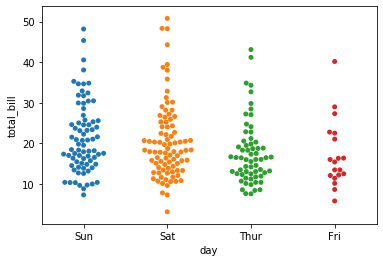

In [13]:
# カテゴリごとの分布を描画
# 横軸を曜日カテゴリに分けて、縦軸にtotal_billを指定して描画
# 同じ値を横にずらす
sns.swarmplot("day","total_bill",data=tips)

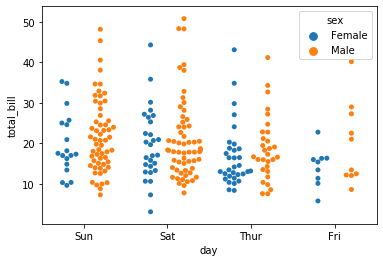

In [14]:
# カテゴリをさらにグループ別にして描画
# hueにsexを指定することで、男女で分けた表示を行う
sns.swarmplot("day","total_bill",data=tips,hue="sex",dodge=True)
#hue（色相）可視化の切り口をさらに追加
#dodge（かわす、回避する） Trueで追加した切り口を重ねない。

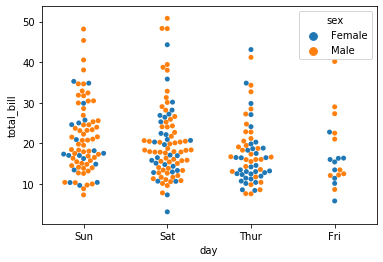

In [15]:
# dodge = Falseとすると、重なって表示される
sns.swarmplot("day","total_bill",data=tips,hue="sex",dodge=False)

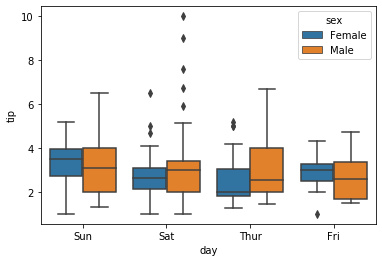

In [16]:
# 箱ひげ図の描画
# swarmplotと同じように、各曜日の男女のデータを並べて表示できる
sns.boxplot(tips.day,tips.tip,hue=tips.sex)
#自動で外れ値が表示されている

## Seabornの強み 演習

#### 問題１
支払い総額とチップ総額のヒストグラム及び散布図を可視化してみよう

#### 問題2
性別毎のチップの総額の分布をboxplot、さらに曜日の色相も追加してみよう

答え（問題1）
<!--
sns.pairplot(tips[['total_bill','tip']])
-->

答え（問題2）
<!--
sns.boxplot(tips["sex"], tips["tip"], hue = tips["day"])
plt.show() #なくてもグラフは表示されるが 
           #<matplotlib.axes._subplots.AxesSubplot at 0x7fb182b86690>が消える
-->

### 演習



#### houseデータ
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction 

ワシントン州キング郡の住宅価格に関するデータセット\
配布したフォルダの中にある"house_data.csv"は一部改変されています。

In [18]:
house = pd.read_csv("house_data.csv") #物件データ
house.head()
#id:物件ID, price:価格(ドル), sqft_living:リビングの広さ
#condition:家の状態(値が大きいほど良い),

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,3,6,770,0,1933
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,5,7,1050,910,1965
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,3,8,1680,0,1987


#### 問題1
Matplotlibの関数を用いて、新しいデータ列"price_jp"を作った後\
以下のような散布図を作成せよ

|横軸|縦軸|条件|
|:---|:---|:---|
|日本円に変化した価格 <br> 1ドル100円とする|リビングの広さ|点の大きさ：1 <br> 点の色：green|


Matplotlibの散布図公式リファレンスを見て、点の大きさを変える引数を探そう
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

答え
<!--
house["price_jp"] = house["price"]*100 # "price_jp"の列を追加してみた
x = house["price_jp"]
y = house["sqft_living"]

plt.scatter(x,y,s=1,c="green")
#引数sが点の大きさ、cが色
plt.show()
-->

#### 問題2
家の状態 "condition"は0-5の値で表現されている。\
以下の表に従い、新しいデータ列"good/bad"を作成せよ。

|condition|good/bad|
|:---|:---|
|0-2|bad|
|3-5|good|


In [19]:
#参考
#condition列の要素の内訳
house["condition"].value_counts()

3    6190
4    2849
5     862
2      86
1      12
Name: condition, dtype: int64

ヒント1
<!--
#locを使ってbadを代入する
house.loc[ houseにある"condition"列の値が3以上, "good/bad"] = "good"
#locで、"condition"列の値が2以下の行を取り出し、"good/bad"列に値を代入
-->

ヒント2
<!--
house.loc[house["condition"]>=3,"good/bad"] = "good"
-->

答え
<!--
#"good/bad"列を仮生成
house["good/bad"] = 0 

# "good/bad"列のhouse["condition"] >= 3の条件に合致する行を取り出し、"good"を代入する
house.loc[house["condition"]>=3,"good/bad"] = "good"

# "good/bad"列のhouse["condition"] <= 2の条件に合致する行を取り出し、"bad"を代入する
house.loc[house["condition"]<=2,"good/bad"] = "bad"

#確認
#house["good/bad"]
house["good/bad"].value_counts()
-->

#### 問題3
Seabornの関数を用いて以下のような箱ひげ図を作成せよ

|横軸|縦軸|条件|
|:---|:---|:---|
|家のグレード(4と5のみ可視化せよ)|日本円に変換した価格|good/badで色相を分ける|

複数の条件をデータ抽出するには\
df[ (条件1) & (条件2)]\
を使う。

ヒント1
<!--
x = house[ (house["grade"] > 3) & (house["grade"] < 6) ]
#グレードが4と5のデータフレームができる
-->

答え
<!--
x = house[ (house["grade"] > 3) & (house["grade"] < 6) ]
#グレードが4と5のデータフレームができる
sns.boxplot(x.grade,house.price_jp,hue=house["good/bad"])

#別解
df = house[ (house["grade"] > 3) & (house["grade"] < 6) ]
sns.boxplot("grade","price_jp",data = df, hue=df["good/bad"])
-->